# Задача 4

Используя интегральное представление для функций Бесселя целого индекса m:

$$ J_m(x) = \frac{1}{\pi} \int_0^{\pi} \cos{(mt - x \sin{t})}dt $$

и вычисляя производную с помощью конечной разности в тех же точках, что и сам интеграл, продемонстрировать выполнение равенства

$$ J_0'(x) + J_1(x) = 0 $$

с точностью не хуже $10^{-10}$ на отрезке $x \in [0, 2\pi]$

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Задаем подынтегральную функцию, переделы, отрезок для x

In [3]:
class Func:
    def __init__(self):
        self.x = 0.0
        self.m = 1
    
    def set_x(self, x):
        self.x = x
        
    def set_m(self, m):
        self.m = m
        
    def func(self, t):
        return np.cos(self.m*t - self.x*np.sin(t))

In [4]:
t_l = 0 #нижний предел интегрирования
t_h = np.pi #верхний предел

#интервал по x
x_l = 0
x_h = 2*np.pi 

#### Определем функции для интегрирования (методом Симпсона)

* f - подынтегральная функция
* N - число интервалов разбиения
* $[a, b]$ - отрезок интегрирования
* h - ширина интервалов разбиения

In [5]:
def simpson_method(f, N, a, b):
    
    h = (b - a)/N
    S = 0
    
    f_xi = f(a) #f(x_i)
    f_x2 = 0 # f((x_i + x_i+1)/2) - значение функции в середине отрезка
    f_xi1 = 0 #f(x_i+1)
    
    for i in range (1, N+1):
        f_x2 = f(a + (i-1/2)*h) #center
        f_xi1 = f(a + i*h)
        S += f_xi + 4*f_x2 + f_xi1
        f_xi = f_xi1
        
    S = h*S
    return S

#### Нахождение производной методом конечной разности:

$$ f'(a) = 1! \cdot \frac{f(a + h) - f(a - h)}{2h} $$

"Конечные разности нечётного порядка аппроксимируют значения соответствующих производных со вторым порядком точности в средней точке между центральными узлами сетки, тогда как аппроксимация в узлах имеет лишь первый порядок по $h$ . Как следствие, для аппроксимации производных нечётного порядка в узлах $x_i$, конечные разности выгодно вычислять на сетке с удвоенным шагом $2h$."

#### Считаем: 

Делим интервал для $x \in [0, 2\pi]$ на k интервалов. И будем проверять выполнение равенства в точках $ 0 = x_0, x_1, x_2 .... x_k = 2\pi $
$$ x_i = x_0 + i\cdot step $$

In [6]:
N = 30 #интервалы разбиения для интегрирования
#на 30 падала точность в 3 задании
k = 30 #интервалы для x
h_der = 1e-5 #шаг для производной
print('h', h_der)
x_step = (x_h - x_l)/k
print(x_step*k)

x_s = [] #x_i
results = [] #значение разности в каждом x_i

x_i = x_l #x_0 = x_l = 0
print(x_i)

F = Func()

h 1e-05
6.283185307179586
0


In [7]:
for i in range(k+1):
    x_i = x_l + i*x_step
    x_s.append(x_i)
    
    F.set_m(1)
    F.set_x(x_i)
    J1 = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
    
    F.set_m(0)
    F.set_x(x_i + h_der)
    J0_right = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
    F.set_x(x_i - h_der)
    J0_left = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
    der = (J0_right - J0_left)/(2*h_der)
    
    results.append(J1 + der)

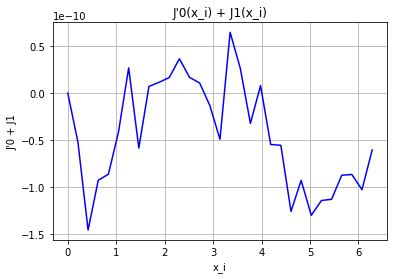

In [8]:
plt.plot(x_s, results, 'b')
plt.grid()
plt.xlabel('x_i')
plt.ylabel('J\'0 + J1')
plt.title('J\'0(x_i) + J1(x_i)')
plt.show()

#### Исследуем поведение результатов в зависимости от размеров шагов для вычисления интеграла и производной

##### 1. Шаг для вычисления интеграла
`N` - кол-во интералов разбиения для интегрирования

Будем варьировать от 10 до 600 с шагом в 10. Построим график зависимости максимального по модулю значения $J_0'(x) + J_1(x)$ от `N`.

In [9]:
t_l = 0 #нижний предел интегрирования
t_h = np.pi #верхний предел

#интервал по x
x_l = 0
x_h = 2*np.pi 

k = 30 #интервалы для x
h_der = 1e-5 #шаг для производной
x_step = (x_h - x_l)/k

x_i = x_l #x_0 = x_l = 0

F = Func()

results_N = []

for N in range (10, 601, 10):
    res_max = 0
    for i in range(k+1):
        x_i = x_l + i*x_step
    
        F.set_m(1)
        F.set_x(x_i)
        J1 = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)

        F.set_m(0)
        F.set_x(x_i + h_der)
        J0_right = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
        F.set_x(x_i - h_der)
        J0_left = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
        der = (J0_right - J0_left)/(2*h_der)
        
        if abs(J1 + der) > res_max:
            res_max = abs(J1 + der)
    results_N.append(res_max)

In [10]:
N = 600
(t_h - t_l)/N

0.005235987755982988

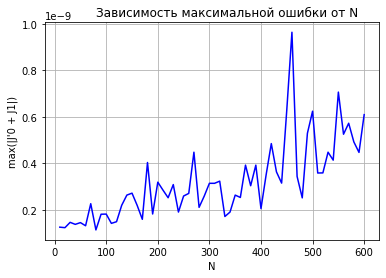

In [11]:
plt.plot([N for N in range(10, 601, 10)], results_N, 'b')
plt.grid()
plt.xlabel('N')
plt.ylabel('max(|J\'0 + J1|)')
plt.title('        Зависимость максимальной ошибки от N')
plt.show()

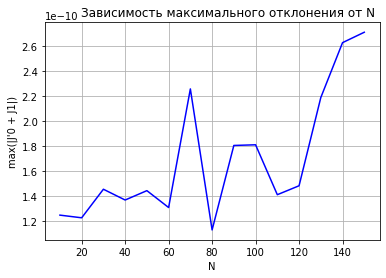

In [12]:
plt.plot([N for N in range(10, 601, 10)][:15], results_N[:15], 'b')
plt.grid()
plt.xlabel('N')
plt.ylabel('max(|J\'0 + J1|)')
plt.title('        Зависимость максимального отклонения от N')
plt.show()

##### 2. Шаг для вычисления производной

`h_der` - шаг для вычисления производной методом конечной разности. Будем менять от $1$ до $10^{-10}$, уменьшая на каждом шаге в 10 раз. Построим график зависимости максимального по модулю значения $J_0'(x) + J_1(x)$ от `h_der`.

In [13]:
simpson_method(F.func, N, t_l, t_h)

#интервал по x
x_l = 0
x_h = 2*np.pi 

N = 30 #шаг для вычисления интеграла
k = 30 #интервалы для x

x_step = (x_h - x_l)/k

x_i = x_l #x_0 = x_l = 0

F = Func()

results_h = []
h_val = []

h_der = 0.1

for j in range (10):
    
    h_der = h_der/10
    h_val.append(h_der)
    res_max = 0
    
    for i in range(k+1):
        x_i = x_l + i*x_step
    
        F.set_m(1)
        F.set_x(x_i)
        J1 = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)

        F.set_m(0)
        F.set_x(x_i + h_der)
        J0_right = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
        F.set_x(x_i - h_der)
        J0_left = simpson_method(F.func, N, t_l, t_h)*(1/np.pi)
        der = (J0_right - J0_left)/(2*h_der)
        
        if abs(J1 + der) > res_max:
            res_max = abs(J1 + der)
    results_h.append(res_max)

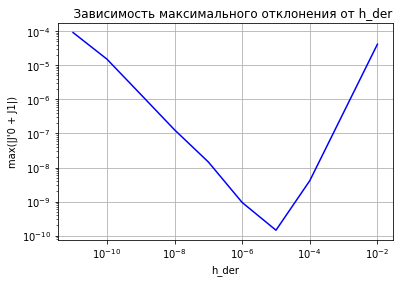

In [14]:
plt.plot(h_val, results_h, 'b')
plt.grid()
plt.xlabel('h_der')
plt.ylabel('max(|J\'0 + J1|)')
plt.loglog()
plt.title('    Зависимость максимального отклонения от h_der')
plt.show()

In [15]:
h_val

[0.01,
 0.001,
 0.0001,
 1e-05,
 1.0000000000000002e-06,
 1.0000000000000002e-07,
 1.0000000000000002e-08,
 1.0000000000000003e-09,
 1.0000000000000003e-10,
 1.0000000000000003e-11]

In [16]:
results_h

[4.116718863045321e-05,
 4.1167388964424845e-07,
 4.117234553291382e-09,
 1.4528112046718888e-10,
 9.449509230652353e-10,
 1.4554071947614489e-08,
 1.2755447520440555e-07,
 1.3961684013352738e-06,
 1.5075311097789701e-05,
 9.057047677218932e-05]